# AWS - Use Case 1 

### by/Alaa Hassan

# <a name="0"> Decision Tree Model

In this notebook, we build, train, and tune Decision Tree Classifier to predict the "default payment next month" field  if client will default the payment (1) or not (0) .
Input: historical customers data.

1. <a href="#1">Import libraries</a>
2. <a href="#2">Read the dataset</a>
3. <a href="#3">Exploratory Data Analysis</a>
4. <a href="#4">Pre-processing</a>
5. <a href="#5">Setting up the Decision Tree</a>
6. <a href="#6">Modeling</a>
7. <a href="#7">Prediction</a>
8. <a href="#8">Evaluation</a>
9. <a href="#9">Visualization</a>

## 1. <a name="1">Import libraries</a>
(<a href="#0">Go to top</a>)

In [1]:
import pandas as pd  
import glob 
import warnings
import numpy as np    
from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt   
from IPython.display import Image                 
from IPython.display import display               
from sklearn.datasets import dump_svmlight_file   
from time import gmtime, strftime 
import seaborn as sns
import sys                                        
import math                                       
import json
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

## 2. <a name="2">Read the dataset</a>
(<a href="#0">Go to top</a>)

In [2]:
path_to_excel_files = glob.glob(r'F:\AWS\UseCase1\Use Case 1\default of credit card clients.xls')
for excel in path_to_excel_files:
 out = excel.split('.')[0]+'.csv'
 df = pd.read_excel(excel,skiprows=1)
 df.to_csv(out) 

In [3]:
data = df

## 3. <a name="3">Exploratory Data Analysis</a>
(<a href="#0">Go to top</a>)

In [4]:
#see all column names & rows 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
data.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,female,university,married,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,female,university,single,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,female,university,single,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,female,university,married,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,male,university,married,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,male,graduate school,single,37,0,0,0,0,0,0,64400,57069,57608,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,7,500000,male,graduate school,single,29,0,0,0,0,0,0,367965,412023,445007,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,8,100000,female,university,single,23,0,-1,-1,0,0,-1,11876,380,601,221,-159,567,380,601,0,581,1687,1542,0
8,9,140000,female,others,married,28,0,0,2,0,0,0,11285,14096,12108,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,10,20000,male,high school,single,35,-2,-2,-2,-2,-1,-1,0,0,0,0,13007,13912,0,0,0,13007,1122,0,0


In [6]:
data.describe()

,ID,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,35.518833,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,9.528019,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,267.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


## 4. <a name="4">Pre-processing</a>
(<a href="#0">Go to top</a>)

In [7]:
data['LIMIT_BAL'] = data['LIMIT_BAL']/1200000

In [8]:
data['AGE'] = data['AGE']/100

In [9]:
data['PAY_0'] = data['PAY_0']+10
data['PAY_0'] = data['PAY_0']/20
data['PAY_2'] = data['PAY_2']+10
data['PAY_2'] = data['PAY_2']/20
data['PAY_3'] = data['PAY_3']+10
data['PAY_3'] = data['PAY_3']/20
data['PAY_4'] = data['PAY_4']+10
data['PAY_4'] = data['PAY_4']/20
data['PAY_5'] = data['PAY_5']+10
data['PAY_5'] = data['PAY_5']/20
data['PAY_6'] = data['PAY_6']+10
data['PAY_6'] = data['PAY_6']/20

In [10]:
pd.set_option('display.max_columns', 10)
data.PAY_5.unique()

array([0.4 , 0.5 , 0.45, 0.6 , 0.65, 0.75, 0.7 , 0.85, 0.9 , 0.8 ])

In [11]:
#change missing data
data['PAY_0'] = data['PAY_0'].mask(data['PAY_0'] <.45 , 0)
data['PAY_0'] = data['PAY_0'].mask(data['PAY_0'] >.9 , 0)
data['PAY_2'] = data['PAY_2'].mask(data['PAY_2'] <.45 , 0)
data['PAY_2'] = data['PAY_2'].mask(data['PAY_2'] >.9 , 0)
data['PAY_3'] = data['PAY_3'].mask(data['PAY_3'] <.45 , 0)
data['PAY_3'] = data['PAY_3'].mask(data['PAY_3'] >.9 , 0)
data['PAY_4'] = data['PAY_4'].mask(data['PAY_4'] <.45 , 0)
data['PAY_4'] = data['PAY_4'].mask(data['PAY_4'] >.9 , 0)
data['PAY_5'] = data['PAY_5'].mask(data['PAY_5'] <.45 , 0)
data['PAY_5'] = data['PAY_5'].mask(data['PAY_5'] >.9 , 0)
data['PAY_6'] = data['PAY_6'].mask(data['PAY_6'] <.45 , 0)
data['PAY_6'] = data['PAY_6'].mask(data['PAY_6'] >.9 , 0)

In [12]:
pd.set_option('display.max_columns', 10)
data.PAY_2.unique()

array([0.6 , 0.5 , 0.45, 0.  , 0.65, 0.75, 0.85, 0.7 , 0.55, 0.8 , 0.9 ])

In [13]:
data['BILL_AMT1'] = data['BILL_AMT1']/2000000
data['BILL_AMT2'] = data['BILL_AMT2']/2000000
data['BILL_AMT3'] = data['BILL_AMT3']/2000000
data['BILL_AMT4'] = data['BILL_AMT4']/2000000
data['BILL_AMT5'] = data['BILL_AMT5']/2000000
data['BILL_AMT6'] = data['BILL_AMT6']/2000000

In [14]:
data['PAY_AMT1'] = data['PAY_AMT1']/2000000
data['PAY_AMT2'] = data['PAY_AMT2']/2000000
data['PAY_AMT3'] = data['PAY_AMT3']/2000000
data['PAY_AMT4'] = data['PAY_AMT4']/2000000
data['PAY_AMT5'] = data['PAY_AMT5']/2000000
data['PAY_AMT6'] = data['PAY_AMT6']/2000000

##### Replace 'SEX' column with 'male' and 'female' columns

In [15]:
data.insert(1, "male", "0" or "1")     

In [16]:
data.insert(1, "female", "0" or "1" )

In [17]:
list(data.columns.values)

['ID',
 'female',
 'male',
 'LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

In [18]:
data["female"] = data["SEX"].copy()


In [19]:
data["female"] = data["female"].replace(['female','male'],['1','0'])

In [20]:
data["male"] = data["SEX"].copy()

In [21]:
data["male"] = data["male"].replace(['male','female'],['1','0'])

In [22]:
pd.set_option('display.max_columns', 10)
data.EDUCATION.unique()

array(['university', 'graduate school', 'others', 'high school', nan, 0],
      dtype=object)

In [23]:
data["EDUCATION"] = data["EDUCATION"].replace(['others', None, 0],'0')

In [24]:
data["EDUCATION"] = data["EDUCATION"].replace(['high school', 'graduate school', 'university'],['1','2','3'])


In [25]:
pd.set_option('display.max_columns', 10)
data.EDUCATION.unique()

array(['3', '2', '0', '1'], dtype=object)

In [26]:
pd.set_option('display.max_columns', 10)
data.MARRIAGE.unique()

array(['married', 'single', nan, 0], dtype=object)

In [27]:
data["MARRIAGE"] = data["MARRIAGE"].replace([None, 0],'0')


In [28]:
data["MARRIAGE"] = data["MARRIAGE"].replace(['single', 'married'],['1','2'])


In [29]:
data.nunique()

ID                            30000
female                            2
male                              2
LIMIT_BAL                        81
SEX                               2
EDUCATION                         4
MARRIAGE                          3
AGE                              63
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default payment next month        2
dtype: int64

In [30]:
data.columns

Index(['ID', 'female', 'male', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE',
       'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
       'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5',
       'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6', 'default payment next month'],
      dtype='object')

In [31]:
numeric_features = ['LIMIT_BAL', 'male', 'female', 'EDUCATION', 'MARRIAGE',
       'AGE','PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
       'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5',
       'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6']
label = ['default payment next month']
all_features = numeric_features + label 

#### Target distribution

Check target distribution.

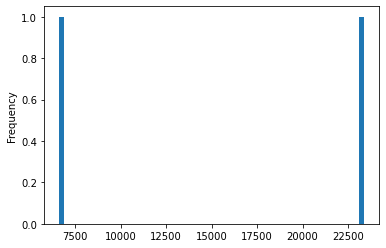

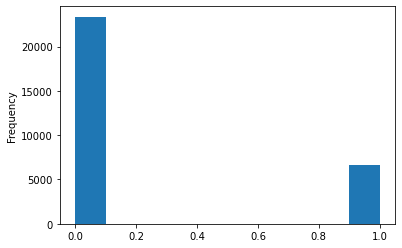

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt

data['default payment next month'].value_counts().plot.hist(bins=70)
plt.show()

data['default payment next month'].plot.hist(bins=10)
plt.show()

In [33]:
data['default payment next month'].value_counts(ascending=True)


1     6636
0    23364
Name: default payment next month, dtype: int64

Text(0.5, 1.0, 'dataset correlation')

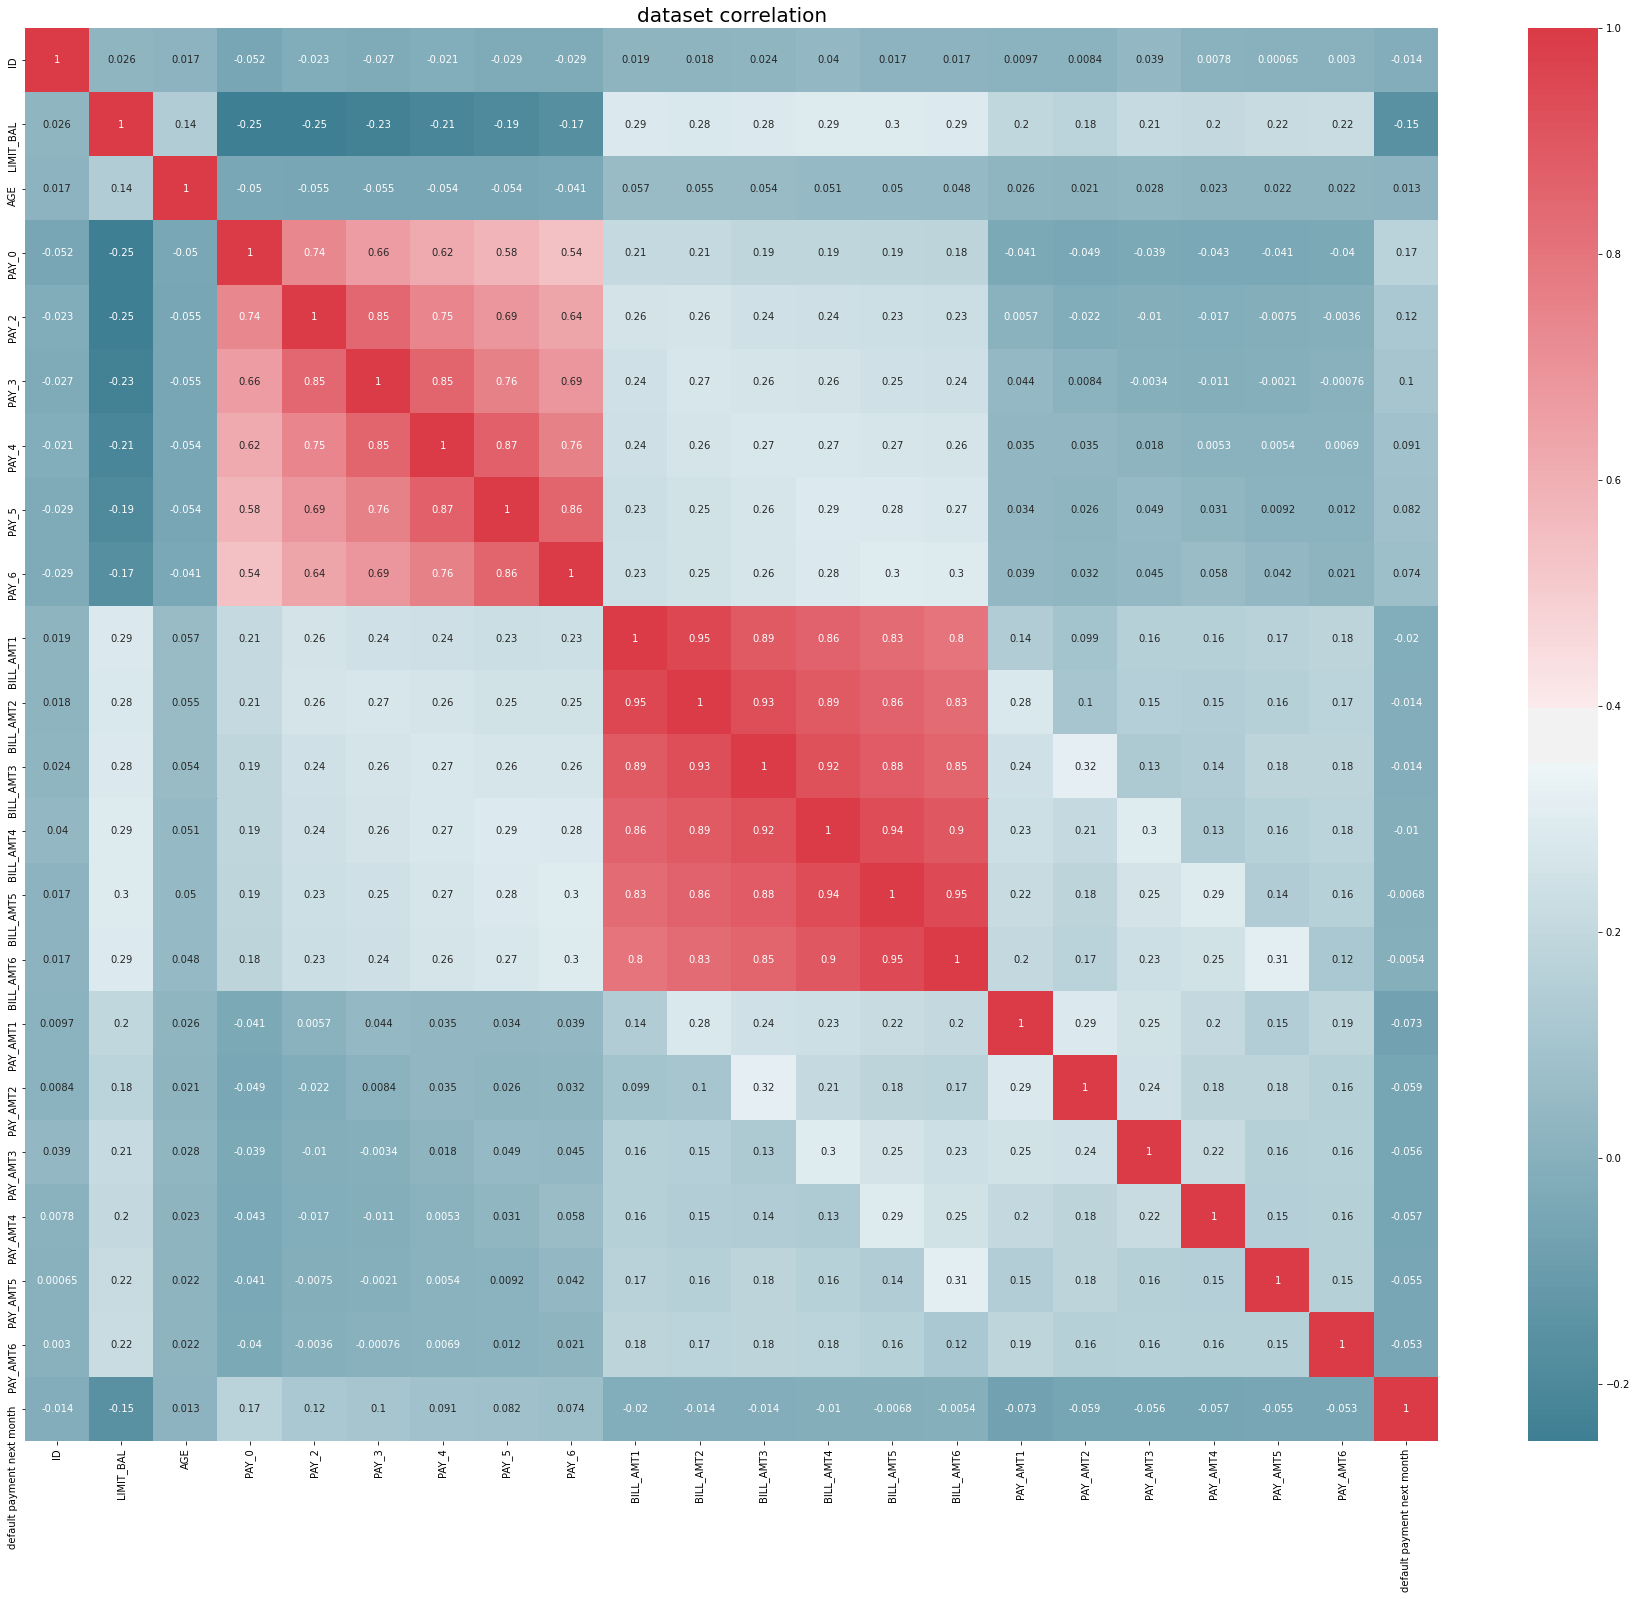

In [34]:
# Display correlation 
f, ax = plt.subplots(figsize=(32, 26))
corr = data.corr()
mp = sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, annot = True)
mp.set_title(label='dataset correlation', fontsize=20)

In [35]:
print('all_features:', data[all_features].select_dtypes(include=np.number).columns)


all_features: Index(['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default payment next month'],
      dtype='object')


In [36]:
data[numeric_features].select_dtypes(include=np.number).columns

Index(['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

In [37]:
data[numeric_features] = data[numeric_features].astype(float)

In [38]:
data[label] = data[label].astype(float)

In [39]:
data["ID"] = data['ID'].astype(str)

In [40]:
data["SEX"] = data["SEX"].astype(str)

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  object 
 1   female                      30000 non-null  float64
 2   male                        30000 non-null  float64
 3   LIMIT_BAL                   30000 non-null  float64
 4   SEX                         30000 non-null  object 
 5   EDUCATION                   30000 non-null  float64
 6   MARRIAGE                    30000 non-null  float64
 7   AGE                         30000 non-null  float64
 8   PAY_0                       30000 non-null  float64
 9   PAY_2                       30000 non-null  float64
 10  PAY_3                       30000 non-null  float64
 11  PAY_4                       30000 non-null  float64
 12  PAY_5                       30000 non-null  float64
 13  PAY_6                       300

## 5. <a name="5">Setting up the Decision Tree</a>
(<a href="#0">Go to top</a>)

In [42]:
X = data[['LIMIT_BAL', 'male', 'female', 'EDUCATION', 'MARRIAGE',
       'AGE','PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
       'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5',
       'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6']].values
X[0:24]

array([[ 1.66666667e-02,  0.00000000e+00,  1.00000000e+00,
         3.00000000e+00,  2.00000000e+00,  2.40000000e-01,
         6.00000000e-01,  6.00000000e-01,  4.50000000e-01,
         4.50000000e-01,  0.00000000e+00,  0.00000000e+00,
         1.95650000e-03,  1.55100000e-03,  3.44500000e-04,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  3.44500000e-04,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.00000000e-01,  0.00000000e+00,  1.00000000e+00,
         3.00000000e+00,  1.00000000e+00,  2.60000000e-01,
         4.50000000e-01,  6.00000000e-01,  5.00000000e-01,
         5.00000000e-01,  5.00000000e-01,  6.00000000e-01,
         1.34100000e-03,  8.62500000e-04,  1.34100000e-03,
         1.63600000e-03,  1.72750000e-03,  1.63050000e-03,
         0.00000000e+00,  5.00000000e-04,  5.00000000e-04,
         5.00000000e-04,  0.00000000e+00,  1.00000000e-03],
       [ 7.50000000e-02,  0.00000000e+00,  1.00000000e

In [43]:
y = data["default payment next month"]
y[0:24]

0     1.0
1     1.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    1.0
14    0.0
15    0.0
16    1.0
17    0.0
18    0.0
19    0.0
20    0.0
21    1.0
22    1.0
23    1.0
Name: default payment next month, dtype: float64

In [44]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.2, random_state=23)

## 6. <a name="6">Modeling</a>
(<a href="#0">Go to top</a>)

We will first create an instance of the DecisionTreeClassifier called drugTree.

Inside of the classifier, specify criterion="entropy" so we can see the information gain of each node

In [45]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [46]:
drugTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

## 7. <a name="7">Prediction</a>
(<a href="#0">Go to top</a>)

Let's make some predictions on the testing dataset and store it into a variable called predTree.

In [47]:
predTree = drugTree.predict(X_testset)

In [48]:
print (predTree [0:24])
print (y_testset [0:24])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
29443    0.0
1410     0.0
7241     0.0
18667    0.0
7983     0.0
14981    1.0
22579    0.0
4195     0.0
1769     1.0
16947    0.0
2654     0.0
27225    0.0
26224    0.0
3524     0.0
8304     0.0
4395     0.0
14926    0.0
24884    0.0
2471     1.0
7323     0.0
16266    0.0
1987     0.0
19396    0.0
14348    0.0
Name: default payment next month, dtype: float64


## 8. <a name="8">Evaluation</a>
(<a href="#0">Go to top</a>)

In [49]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.8278333333333333


## 9. <a name="9">Visualization</a>
(<a href="#0">Go to top</a>)

In [50]:
# Fit the regressor, set max_depth = 3
regr = DecisionTreeRegressor(max_depth=3, random_state=1234)
model = regr.fit(X, y)

In [51]:
text_representation = tree.export_text(regr)
print(text_representation)

|--- feature_6 <= 0.58
|   |--- feature_7 <= 0.58
|   |   |--- feature_20 <= 0.00
|   |   |   |--- value: [0.22]
|   |   |--- feature_20 >  0.00
|   |   |   |--- value: [0.12]
|   |--- feature_7 >  0.58
|   |   |--- feature_11 <= 0.55
|   |   |   |--- value: [0.37]
|   |   |--- feature_11 >  0.55
|   |   |   |--- value: [0.53]
|--- feature_6 >  0.58
|   |--- feature_8 <= 0.47
|   |   |--- feature_12 <= 0.00
|   |   |   |--- value: [0.24]
|   |   |--- feature_12 >  0.00
|   |   |   |--- value: [0.55]
|   |--- feature_8 >  0.47
|   |   |--- feature_11 <= 0.55
|   |   |   |--- value: [0.67]
|   |   |--- feature_11 >  0.55
|   |   |   |--- value: [0.77]



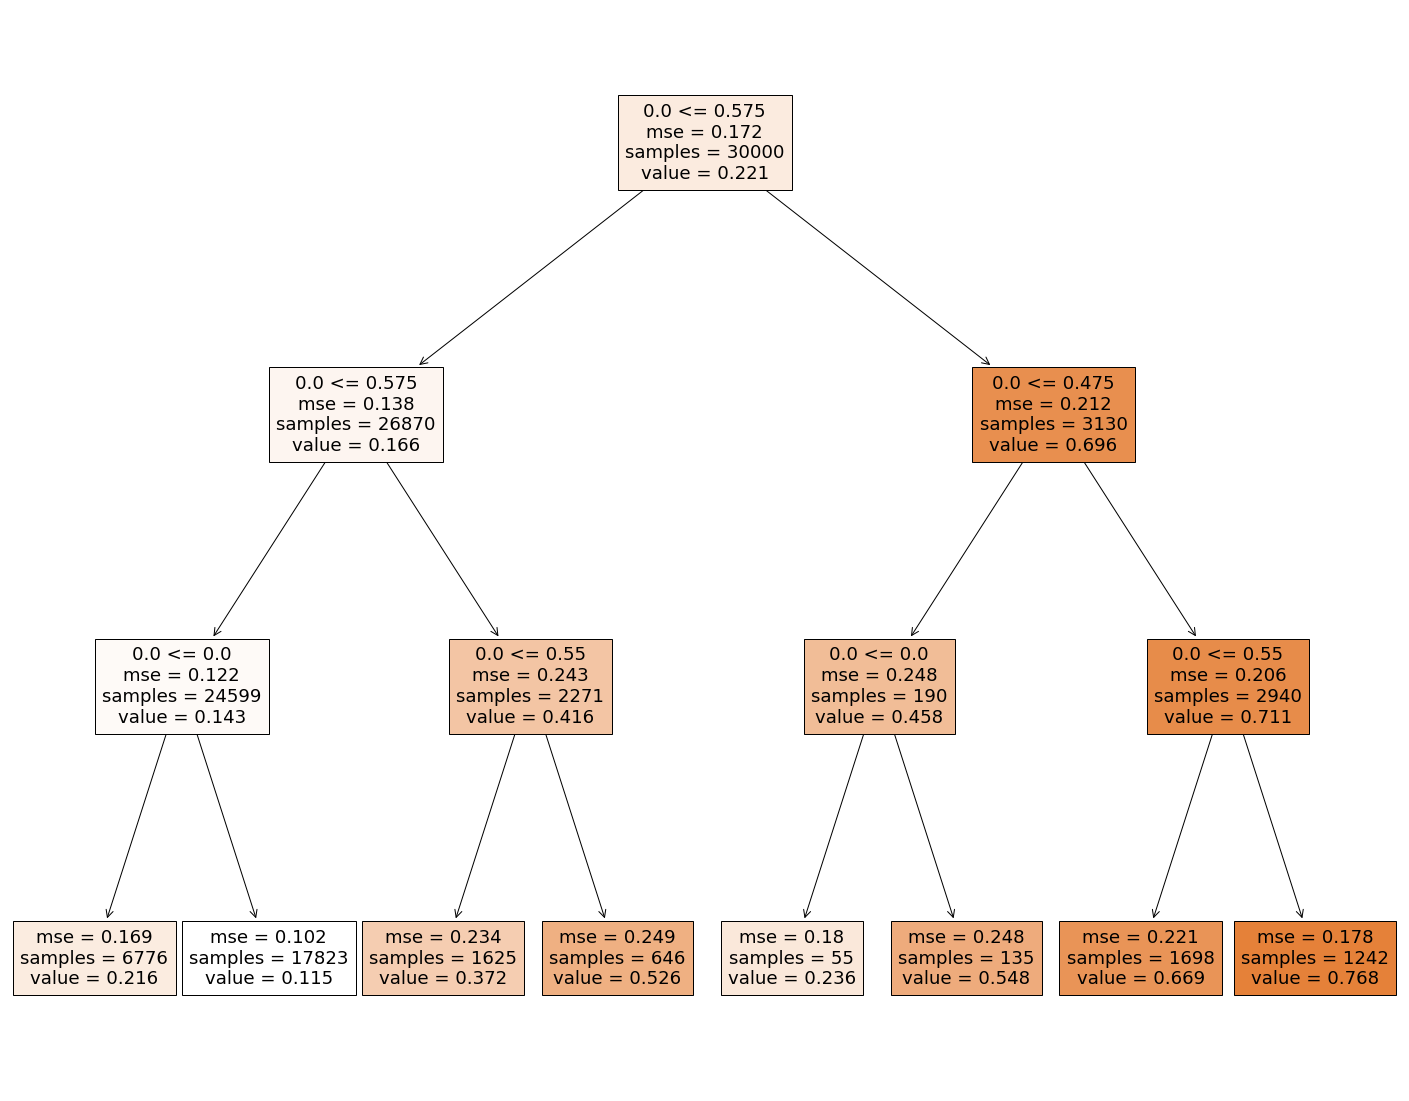

In [52]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(regr, feature_names=data['default payment next month'] , filled=True)